In [1]:
# Importing dataset,
    #1.Since data is in form of excel file we have to use pandas read_excel to load the data\n",
    #2.After loading it is important to check null values in a column or a row\n",
    #3.If it is present then following can be done,\n",
        #a.Filling NaN values with mean, median and mode using fillna() method\n",
        #b.If Less missing values, we can drop it as well\n"import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data= pd.read_excel('C:/Users/burulaks/Desktop/dataset/fligts/Data_Train.xlsx')


In [7]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [8]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
data.shape

(10683, 11)

In [10]:
#deleting missing values
data.dropna(inplace=True)

In [11]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [13]:
# From description we can see that Date_of_Journey is a object data type.
    #Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction,bcz our model will not be able to understand Theses string values,it just understand Time-stamp
    #For this we require pandas to_datetime to convert object data type to datetime dtype
def change_into_datetime(col):
    data[col]= pd.to_datetime(data[col])

In [14]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(i)

In [15]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [16]:
#Saving day, month, year in seperate columns for "Date_of jounrney"
data['j_day']=data['Date_of_Journey'].dt.day
data['j_mon']=data['Date_of_Journey'].dt.month
data['j_year']=data['Date_of_Journey'].dt.year



In [17]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,j_day,j_mon,j_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-06-21 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-06-21 05:50:00,2021-06-21 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-21 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-06-21 18:05:00,2021-06-21 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-06-21 16:50:00,2021-06-21 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [18]:
#dropping Date_of_Journey 
data.drop('Date_of_Journey', axis=1, inplace= True)

In [19]:
data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,j_day,j_mon,j_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-06-21 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-06-21 05:50:00,2021-06-21 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-21 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-06-21 18:05:00,2021-06-21 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-06-21 16:50:00,2021-06-21 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2021-06-21 19:55:00,2021-06-21 22:25:00,2h 30m,non-stop,No info,4107,4,9,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,2021-06-21 20:45:00,2021-06-21 23:20:00,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,2021-06-21 08:20:00,2021-06-21 11:20:00,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,2021-06-21 11:30:00,2021-06-21 14:10:00,2h 40m,non-stop,No info,12648,3,1,2019


In [20]:
# preprocessing Dep_ Time and Arrival_Time
def extract_hour(df,col):
    df[col+'_hr']= df[col].dt.hour
    
def extract_min(df,col):
    df[col+'_min']= df[col].dt.minute

def drop_column(df,col):
    df.drop(col, axis=1, inplace=True)

In [21]:
extract_hour(data,'Arrival_Time')
extract_min(data,'Arrival_Time')
drop_column(data,'Arrival_Time')

In [22]:
extract_hour(data,'Dep_Time')
extract_min(data,'Dep_Time')
drop_column(data,'Dep_Time')





In [23]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,j_day,j_mon,j_year,Arrival_Time_hr,Arrival_Time_min,Dep_Time_hr,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,2019,22,25,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,23,20,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,2019,11,20,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,2019,14,10,11,30


In [24]:
#Preprocessing Duration
duration=list(data['Duration'])

In [25]:
duration

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [26]:
for i in range (len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i]+ ' 0m'
        else:
                duration[i]='0h '+ duration[i]
        

In [27]:
data['Duration']= duration

In [28]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,j_day,j_mon,j_year,Arrival_Time_hr,Arrival_Time_min,Dep_Time_hr,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,2019,22,25,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,23,20,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,27,4,2019,11,20,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,2019,14,10,11,30


In [29]:
def hour(x):
    return x.split(' ')[0][0:-1]

def mins(x):
    return x.split(' ')[1][0:-1]

In [30]:
data['duration_hr']= data['Duration'].apply(hour)


In [31]:

data['duration_min']= data['Duration'].apply(mins)

In [32]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,j_day,j_mon,j_year,Arrival_Time_hr,Arrival_Time_min,Dep_Time_hr,Dep_Time_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,2019,22,25,19,55,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,23,20,20,45,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,27,4,2019,11,20,8,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,2019,14,10,11,30,2,40


In [33]:
drop_column(data,'Duration')

In [34]:
data['duration_hr']= data['duration_hr'].astype(int)
data['duration_min']= data['duration_min'].astype(int)



In [35]:
data.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Price                int64
j_day                int64
j_mon                int64
j_year               int64
Arrival_Time_hr      int64
Arrival_Time_min     int64
Dep_Time_hr          int64
Dep_Time_min         int64
duration_hr          int32
duration_min         int32
dtype: object

In [36]:
#Fetching and handling cateogarical data 
cat_data= [col for col in data.columns if data[col].dtype=='O']



In [37]:
cat_data

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [38]:
cont_data= [col for col in data.columns if data[col].dtype!='O']



In [39]:
cont_data

['Price',
 'j_day',
 'j_mon',
 'j_year',
 'Arrival_Time_hr',
 'Arrival_Time_min',
 'Dep_Time_hr',
 'Dep_Time_min',
 'duration_hr',
 'duration_min']

In [40]:
cateogorical= data[cat_data]

In [41]:
cateogorical

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info
...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info


In [42]:
#Using one hot encoding
Airlines= pd.get_dummies(cateogorical['Airline'],drop_first=True)
#drop_first=True for not getting repeated columns

In [43]:
Airlines

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [44]:
Source= pd.get_dummies(cateogorical['Source'],drop_first=True)

In [45]:
Source

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [46]:
Destination= pd.get_dummies(cateogorical['Destination'],drop_first=True)

In [47]:
Destination

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [48]:
cateogorical.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info


In [49]:
cateogorical['Route'].str.split('→').str[0]

0        BLR 
1        CCU 
2        DEL 
3        CCU 
4        BLR 
         ... 
10678    CCU 
10679    CCU 
10680    BLR 
10681    BLR 
10682    DEL 
Name: Route, Length: 10682, dtype: object

In [50]:
cateogorical['Route1']= cateogorical['Route'].str.split('→').str[0]
cateogorical['Route2']= cateogorical['Route'].str.split('→').str[1]
cateogorical['Route3']= cateogorical['Route'].str.split('→').str[2]
cateogorical['Route4']= cateogorical['Route'].str.split('→').str[3]
cateogorical['Route5']= cateogorical['Route'].str.split('→').str[4]

C:\Users\burulaks\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\burulaks\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\burulaks\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [51]:
cateogorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Route                  0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2                 0
Route3              3491
Route4              9116
Route5             10636
dtype: int64

In [52]:
drop_column(cateogorical,'Route')

C:\Users\burulaks\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [53]:
for i in ['Route3','Route4','Route5']:
    cateogorical[i].fillna('None',inplace=True)
    

C:\Users\burulaks\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [54]:
cateogorical

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,None,None
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,CCU,BLR,None,None,None
10679,Air India,Kolkata,Banglore,non-stop,No info,CCU,BLR,None,None,None
10680,Jet Airways,Banglore,Delhi,non-stop,No info,BLR,DEL,None,None,None
10681,Vistara,Banglore,New Delhi,non-stop,No info,BLR,DEL,None,None,None


In [55]:
cateogorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [56]:
# as we will see we have lots of features in Route ,
#one hot encoding will not be a better option lets appply Label Encoding

from sklearn.preprocessing import LabelEncoder

In [57]:
le=LabelEncoder()
for i in ['Route1','Route2','Route3','Route4','Route5']:
    cateogorical[i]=le.fit_transform(cateogorical[i])

C:\Users\burulaks\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
cateogorical

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,2,5,29,13,5
10679,Air India,Kolkata,Banglore,non-stop,No info,2,5,29,13,5
10680,Jet Airways,Banglore,Delhi,non-stop,No info,0,13,29,13,5
10681,Vistara,Banglore,New Delhi,non-stop,No info,0,13,29,13,5


In [59]:
drop_column(cateogorical,'Additional_Info')

C:\Users\burulaks\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [60]:
cateogorical.head(2)

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5


In [61]:
cateogorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [62]:
dict={'non-stop':0, '2 stops':1, '1 stop':2, '3 stops':3,'4 stops':4}

In [63]:
cateogorical['Total_Stops']=cateogorical['Total_Stops'].map(dict)

C:\Users\burulaks\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
cateogorical

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,1,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,1,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,2,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,2,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,2,5,29,13,5
10679,Air India,Kolkata,Banglore,0,2,5,29,13,5
10680,Jet Airways,Banglore,Delhi,0,0,13,29,13,5
10681,Vistara,Banglore,New Delhi,0,0,13,29,13,5


In [65]:
data1= pd.concat([cateogorical,Airlines,Source,Destination,data[cont_data]],axis=1)

In [66]:
data1.drop('Airline',axis=1, inplace=True)
data1.drop('Source',axis=1, inplace=True)
data1.drop('Destination',axis=1, inplace=True)
data1

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,Price,j_day,j_mon,j_year,Arrival_Time_hr,Arrival_Time_min,Dep_Time_hr,Dep_Time_min,duration_hr,duration_min
0,0,0,13,29,13,5,0,0,1,0,...,3897,24,3,2019,1,10,22,20,2,50
1,1,2,25,1,3,5,1,0,0,0,...,7662,5,1,2019,13,15,5,50,7,25
2,1,3,32,4,5,5,0,0,0,1,...,13882,6,9,2019,4,25,9,25,19,0
3,2,2,34,3,13,5,0,0,1,0,...,6218,5,12,2019,23,30,18,5,5,25
4,2,0,34,8,13,5,0,0,1,0,...,13302,3,1,2019,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2,5,29,13,5,0,0,0,0,...,4107,4,9,2019,22,25,19,55,2,30
10679,0,2,5,29,13,5,1,0,0,0,...,4145,27,4,2019,23,20,20,45,2,35
10680,0,0,13,29,13,5,0,0,0,1,...,7229,27,4,2019,11,20,8,20,3,0
10681,0,0,13,29,13,5,0,0,0,0,...,12648,3,1,2019,14,10,11,30,2,40


In [67]:
pd.set_option('display.max_columns',38)

In [68]:
data1['Price']

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [69]:
#checking outliers
def plot(df,col):
    fig,(ax1,ax2)= plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

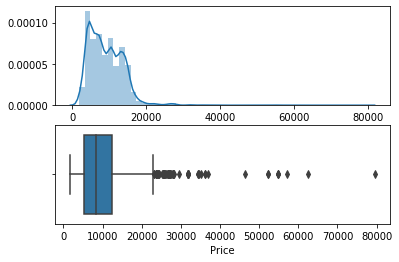

In [70]:
plot(data1,'Price')

In [71]:
data1['Price']=np.where(data1['Price']>=40000,data1['Price'].median(),data1['Price'])

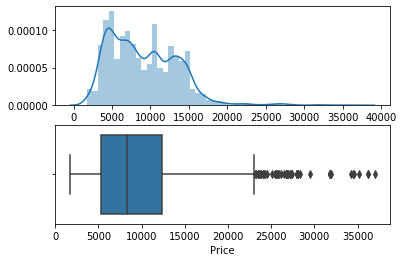

In [72]:
plot(data1,'Price')

In [73]:
#seperating dependent and independent features
x=data1.drop('Price',axis=1)
x.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,j_day,j_mon,j_year,Arrival_Time_hr,Arrival_Time_min,Dep_Time_hr,Dep_Time_min,duration_hr,duration_min
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,2019,1,10,22,20,2,50
1,1,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,2019,13,15,5,50,7,25
2,1,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,2019,4,25,9,25,19,0
3,2,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,2019,23,30,18,5,5,25
4,2,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,2019,21,35,16,50,4,45


In [74]:
y=data1['Price']

In [75]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [76]:
data1

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,j_day,j_mon,j_year,Arrival_Time_hr,Arrival_Time_min,Dep_Time_hr,Dep_Time_min,duration_hr,duration_min
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897.0,24,3,2019,1,10,22,20,2,50
1,1,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662.0,5,1,2019,13,15,5,50,7,25
2,1,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882.0,6,9,2019,4,25,9,25,19,0
3,2,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218.0,5,12,2019,23,30,18,5,5,25
4,2,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302.0,3,1,2019,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2,5,29,13,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4107.0,4,9,2019,22,25,19,55,2,30
10679,0,2,5,29,13,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4145.0,27,4,2019,23,20,20,45,2,35
10680,0,0,13,29,13,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7229.0,27,4,2019,11,20,8,20,3,0
10681,0,0,13,29,13,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,12648.0,3,1,2019,14,10,11,30,2,40


In [77]:
#selecting best features using feture selection technique
from sklearn.feature_selection import mutual_info_classif

In [78]:
mutual_info_classif(x,y)

array([2.1164318 , 1.97529259, 2.82358582, 2.32729541, 1.48142514,
       0.69073316, 0.76557727, 0.1025383 , 0.67280702, 0.93858777,
       0.00919975, 0.56224747, 0.01438188, 0.32184221, 0.00637977,
       0.21404915, 0.        , 0.15878852, 1.54866743, 0.87183659,
       0.29434487, 1.54232541, 0.40610321, 0.28036597, 0.18404221,
       0.37338981, 1.11028293, 0.84398254, 1.42706611, 1.82680765,
       1.51830701, 1.45952144, 1.21954252, 1.7802105 , 1.10279477])

In [79]:
imp=pd.DataFrame(mutual_info_classif(x,y),index=x.columns)

In [80]:
imp.columns=['importance']
imp.sort_values(by='importance', ascending=False)


,importance
Route2,2.808217
Route3,2.254930
Total_Stops,2.157770
Route1,2.006739
Arrival_Time_hr,1.863607
duration_hr,1.743371
Cochin,1.562526
Delhi,1.551403
Arrival_Time_min,1.548005
Route4,1.455239


In [81]:
imp

,importance
Total_Stops,2.157770
Route1,2.006739
Route2,2.808217
Route3,2.254930
Route4,1.455239
Route5,0.745343
Air India,0.781656
GoAir,0.092169
IndiGo,0.648325
Jet Airways,0.939139


In [82]:
#Applying Machine Learning on data and automate the prediction

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [85]:
from sklearn import  metrics
import pickle


In [121]:
#dumping model
def predict(model,dump):
    model1=model.fit(x_train,y_train)
    print('Training score : {}'.format(model1.score(x_train,y_train)))
    y_prediction=model1.predict(x_test)
    print('predictions are: \\n {}'.format(y_prediction))
    
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        file=open(r'C:\Users\burulaks\Desktop\dataset\model1.pkl','wb')
        pickle.dump(model1,file)
        
    
    
        
    

In [123]:
from sklearn.ensemble import RandomForestRegressor

Training score : 0.9544063304094407
predictions are: \n [ 6568.52       10580.05        8149.98566667 ... 10962.71233333
  9532.3875     11010.2625    ]
r2 score: 0.8059261149669346
MAE: 1156.8683402956297
MSE: 3954326.266073465
RMSE: 1988.5487839310015


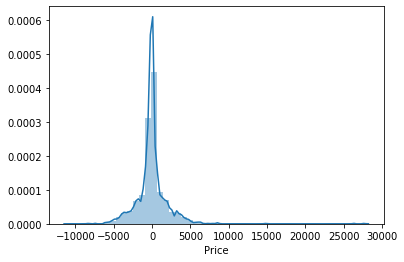

In [124]:
predict(RandomForestRegressor(),1)

In [ ]:
#playing with algorithms

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

Training score : 0.6214823205421185
predictions are: \n [ 8764.78502744  4309.02810403 10792.77156286 ... 12778.3923947
 11639.96086397 10966.5850062 ]
r2 score: 0.5810517042133552
MAE: 2029.3278360301633
MSE: 8536224.489315452
RMSE: 2921.6817912489123


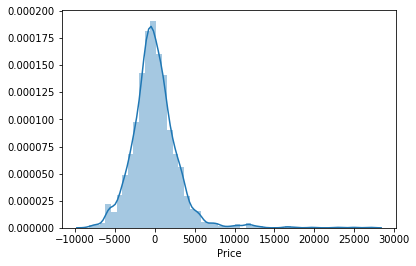

In [126]:
predict(LinearRegression(),0)

Training score : 0.7862056764779569
predictions are: \n [ 8414.   5370.4  8301.8 ... 13437.2 12544.   8878. ]
r2 score: 0.6256834886165354
MAE: 1747.821712681329
MSE: 7626835.586541881
RMSE: 2761.6726066899896


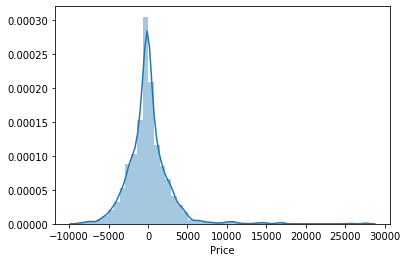

In [127]:
predict(KNeighborsRegressor(),0)

Training score : 0.9673038753969964
predictions are: \n [ 6587.  11005.   7871.5 ...  7064.   8529.  14053. ]
r2 score: 0.7216643992793598
MAE: 1299.2771798471376
MSE: 5671189.488093381
RMSE: 2381.4259358824033


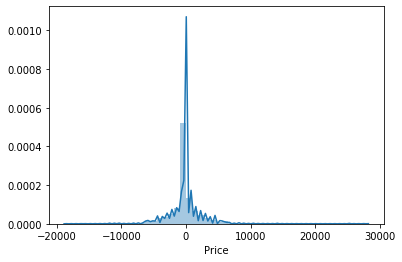

In [128]:
predict(DecisionTreeRegressor(),0)

In [ ]:
# Hyperparameter Tuning

In [143]:
from sklearn.ensemble import RandomForestRegressor

In [149]:
# initialise your estimator
reg_rf=RandomForestRegressor()

In [150]:
from sklearn.model_selection import RandomizedSearchCV

In [151]:
    # Number of trees in random forest
    n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]
    # Maximum number of levels in tree
    max_depth=[int(x) for x in np.linspace(5,30,num=4)]
    

In [152]:
random_grid={
        'n_estimators': n_estimators,
        'max_features': ['auto', 'sqrt'],
        'max_depth': max_depth,
        'min_samples_split': [5, 10, 15, 100]
}

In [153]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [154]:
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [155]:
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [156]:
rf_random.best_params_

{'n_estimators': 760,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 13}

In [157]:
prediction=rf_random.predict(x_test)

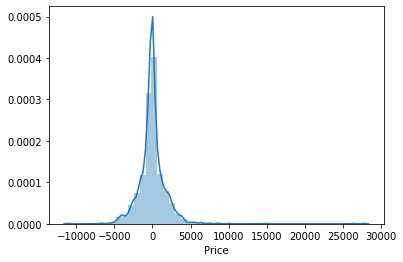

In [158]:
sns.distplot(y_test-prediction)

In [159]:
metrics.r2_score(y_test,prediction)

0.8320317021925332

In [171]:
file=open(r'C:\Users\burulaks\Desktop\dataset\rf_random.pkl','wb')

In [172]:
pickle.dump(rf_random.pkl,file)

In [180]:
model1=open(r'C:\Users\burulaks\Desktop\dataset\model1.pkl','rb')
    

In [181]:
forest=pickle.load(model1)

In [182]:
y_prediction=forest.predict(x_test)

In [183]:
metrics.r2_score(y_test,y_prediction)

0.8059261149669346